In [1]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from mpl_toolkits.basemap import Basemap

*If folium is not installed please use the following code to install the same* - ***!conda install -c conda-forge folium***

In [2]:
import folium
from folium import plugins

In [44]:
import os
os.chdir("/resources/data/Boston_Crime_data_analysis/")
os.listdir()

['boston_crime.csv']

In [52]:
df=pd.read_csv(r'boston_crime.csv', encoding='unicode_escape',low_memory=False)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


***Define Pie plot function***

In [5]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

***Define bar chart function***

In [6]:
def bar_chart(list_number, list_unique,xlabel,ylabel):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel(ylabel) 
    plt.xlabel(xlabel)
    plt.show()
    
    return 0

***Group count of Incidents by day of the week***

***Day when most of the crimes occurred***

In [24]:
#df_dy_crim=pd.DataFrame(df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.transform(max)).reset_index()
df_dy_crim=df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='Number_of_incidents')
dy_mst_crm=df_dy_crim.sort_values(by=['Number_of_incidents'],ascending=False).head(1)
dy_mst_crm

,DAY_OF_WEEK,Number_of_incidents
0,Friday,49758


***The result above could be achieved using a single line of code as mentioned below as well***

In [27]:
df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='Number_of_incidents').sort_values(by='Number_of_incidents', ascending=False).head(1)

,DAY_OF_WEEK,Number_of_incidents
0,Friday,49758


***Highest number of incidents for a particular crime occured in each year***

In [28]:
crm_typ_yr=df.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
crm_typ_yr.head()

,OFFENSE_CODE_GROUP,YEAR,count
159,Motor Vehicle Accident Response,2017,12049
158,Motor Vehicle Accident Response,2016,11534
160,Motor Vehicle Accident Response,2018,8724
124,Larceny,2016,7903
147,Medical Assistance,2017,7817


***Group Crime types by Street***

In [29]:
loc_crm_typ=df.loc[0:,['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','STREET']].groupby('STREET').agg(' ,'.join).reset_index()
loc_crm_typ['Lat']= df.loc[0:,['Lat']]
loc_crm_typ['Long']=df.loc[0:,['Long']]
loc_crm_typ.head()

,STREET,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,Lat,Long
0,ALBANY ST,"Robbery ,Investigate Person ,Vandalism ,Motor ...","ROBBERY - STREET ,INVESTIGATE PERSON ,VANDALIS...",42.262608,-71.121186
1,BLUE HILL AVE,"Auto Theft ,Investigate Person ,Larceny From M...","AUTO THEFT ,INVESTIGATE PERSON ,LARCENY THEFT ...",42.352111,-71.135311
2,COLUMBUS AVE,"Motor Vehicle Accident Response ,Simple Assault","M/V - LEAVING SCENE - PROPERTY DAMAGE ,ASSAULT...",42.308126,-71.076930
3,COMMONWEALTH AVE,"Operating Under the Influence ,Violations ,Inv...","OPERATING UNDER THE INFLUENCE ALCOHOL ,VAL - O...",42.359454,-71.059648
4,MASSACHUSETTS AVE,"Other ,Motor Vehicle Accident Response ,Motor ...","VIOLATION - CITY ORDINANCE ,M/V ACCIDENT INVOL...",42.375258,-71.024663


***Year wise crime count***

In [30]:
df_inc_by_yr=df.groupby('YEAR').count().INCIDENT_NUMBER.reset_index(name="Number of Incidents")
df_inc_by_yr_lbl=df['YEAR'].unique()
df_inc_by_yr_lbl

array([2018, 2017, 2016, 2015])

**A function to create lablel and data list for chart**

In [32]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [33]:
create_list_number_crime('YEAR',df['YEAR'].unique())

(array([2018, 2017, 2016, 2015]), [74356, 100938, 99134, 53392])

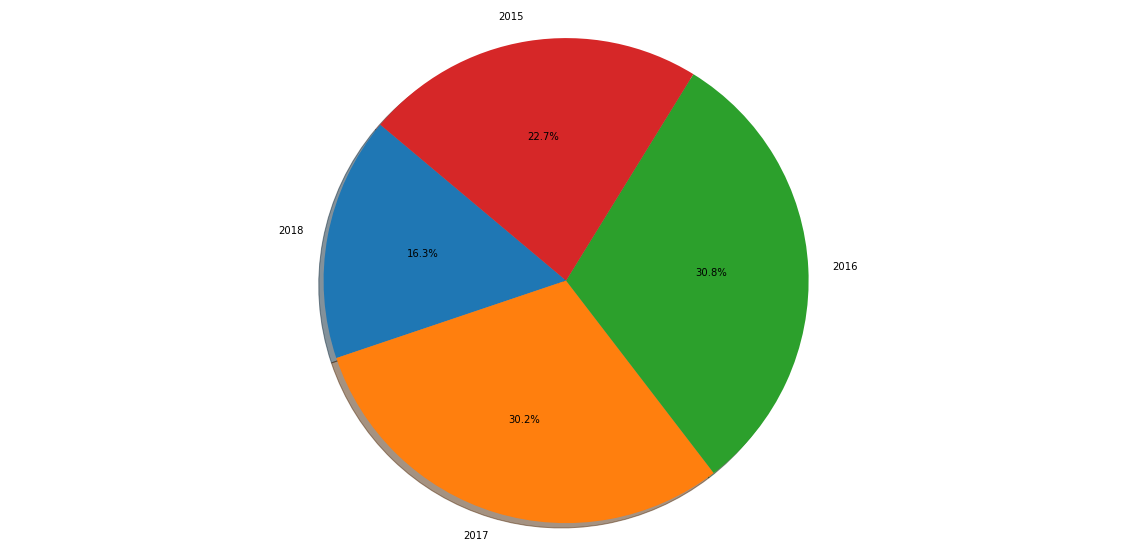

0

In [34]:
pie_plot(list(df['YEAR'].unique()),df_inc_by_yr['Number of Incidents'])

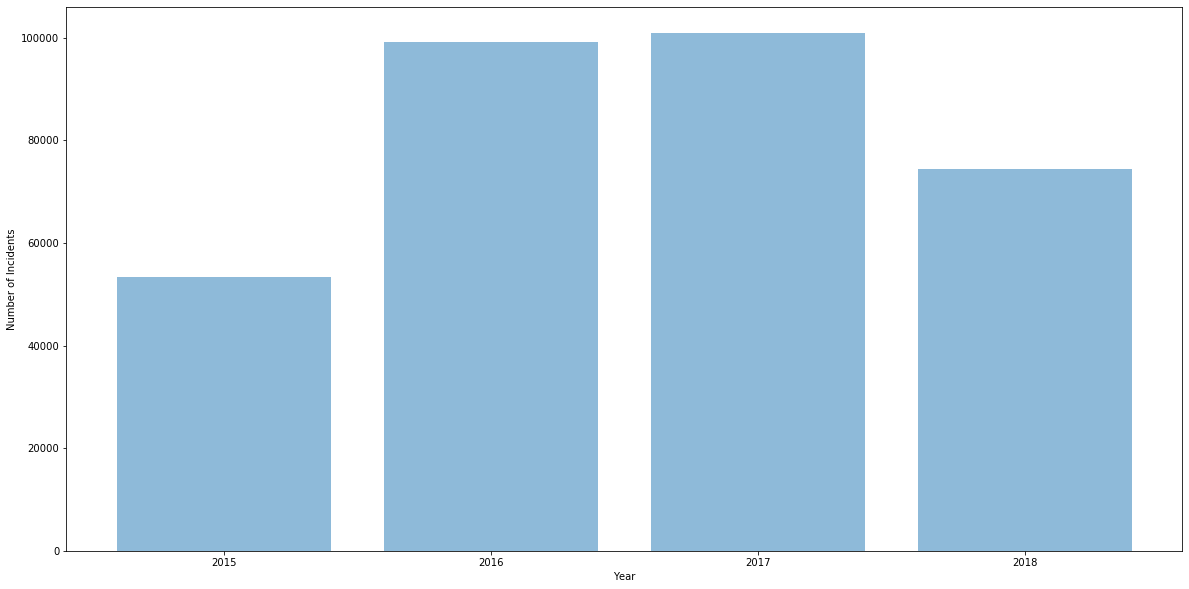

0

In [35]:
bar_chart(df_inc_by_yr['Number of Incidents'],df_inc_by_yr['YEAR'],'Year','Number of Incidents')

***Function to drop Nan values in the input variables***

In [36]:
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

***Month wise crime counts over the years***

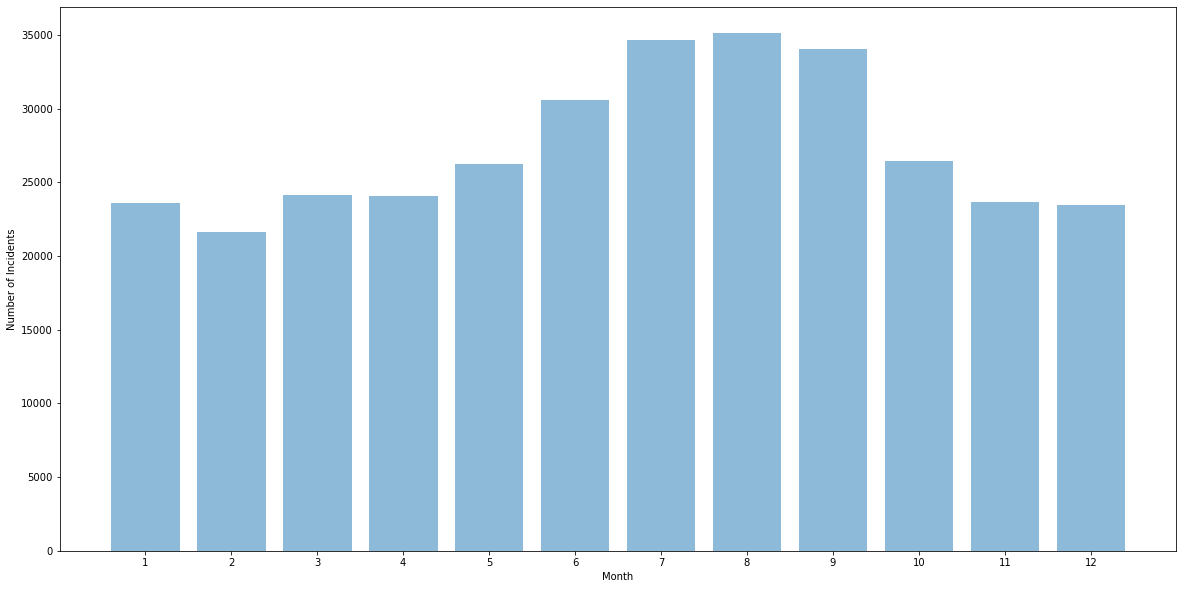

0

In [37]:
df_mnth_crm = df.groupby('MONTH').count().INCIDENT_NUMBER.reset_index(name='Number of Incidents')
bar_chart(df_mnth_crm['Number of Incidents'],df_mnth_crm['MONTH'],'Month','Number of Incidents')

***Day wise crime count over the years***

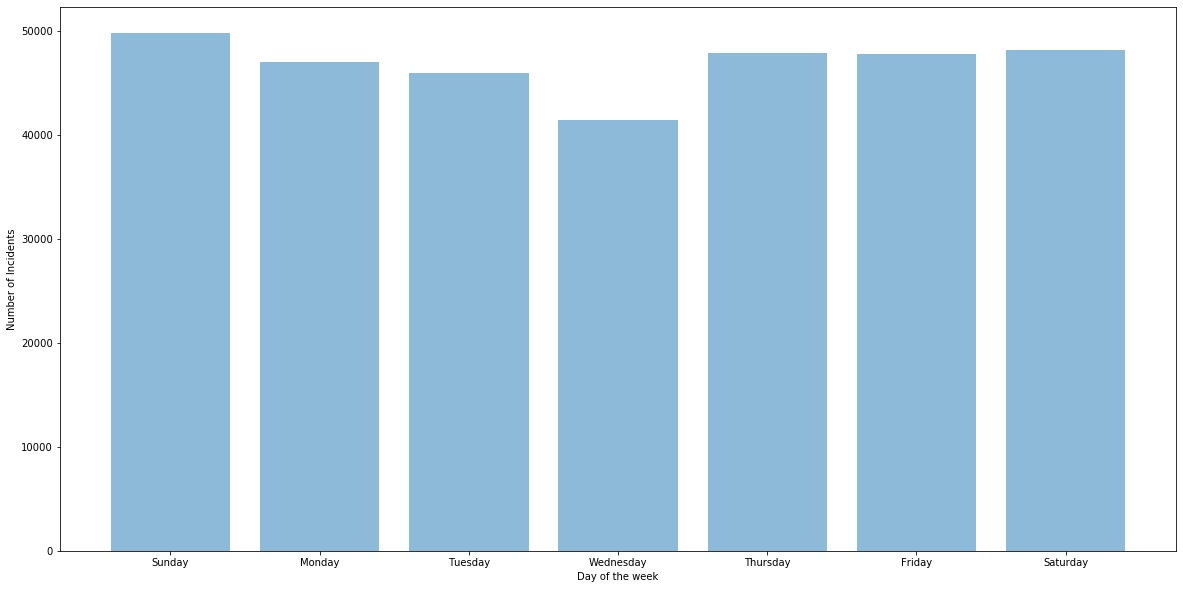

0

In [38]:
df_dy_crim=df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='num_of_incidents')
df_dy_crim.head()
day_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
bar_chart(df_dy_crim['num_of_incidents'],day_of_week,'Day of the week','Number of Incidents')

***Hour wise Crime count over the years***

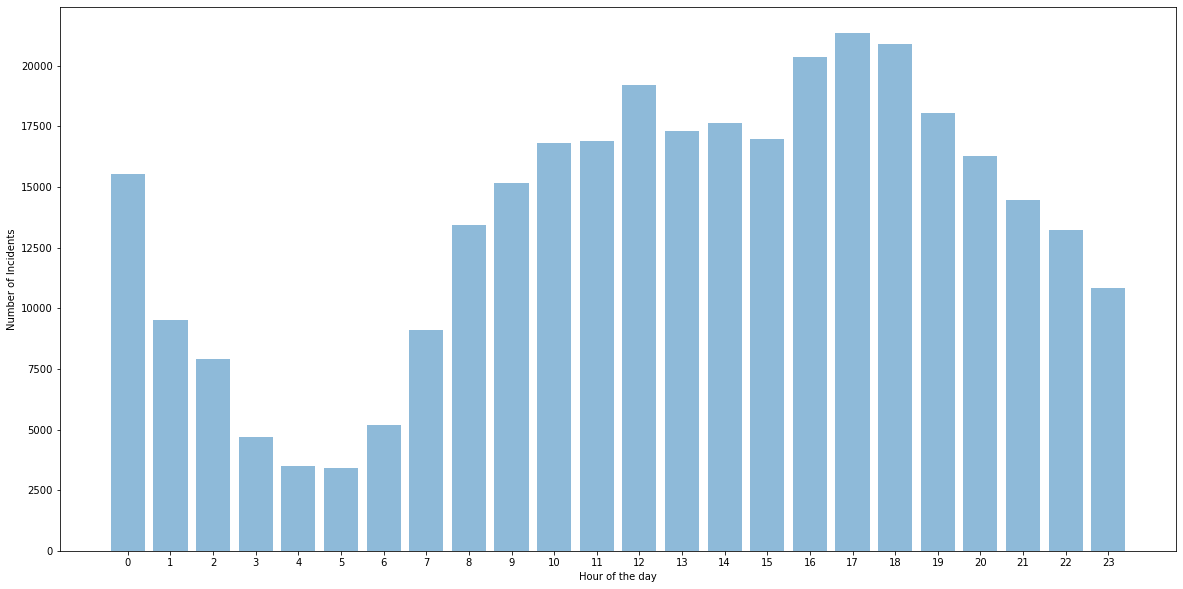

0

In [39]:
hr_num_crm=df.groupby('HOUR').count().INCIDENT_NUMBER.reset_index(name='num_of_inc')
hr_num_crm
bar_chart(hr_num_crm['num_of_inc'],hr_num_crm['HOUR'],'Hour of the day','Number of Incidents')

***Fill na in Shooting column and change it to Numerical category by mapping 0 values to 0 and 'Y' values to 1***

In [53]:
df['SHOOTING'].fillna(0,inplace=True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

df['SHOOTING'].unique()

array([0, 1])

***Shooting occurences count and their percentage in the overall crime***

In [54]:
Shoot_True=len(df.loc[df['SHOOTING'] == 1])
Shoot_False=len(df.loc[df['SHOOTING'] == 0])

print('With shooting(num): ' + str(Shoot_True))
print('With shooting(%):   ' + str(round(Shoot_True*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(Shoot_False))
print('Without shooting(%):   ' + str(round(Shoot_False*100/len(df),2))+'%')

With shooting(num): 1055
With shooting(%):   0.32%

Without shooting(num): 326765
Without shooting(%):   99.68%


***Shooting occurences over the years***

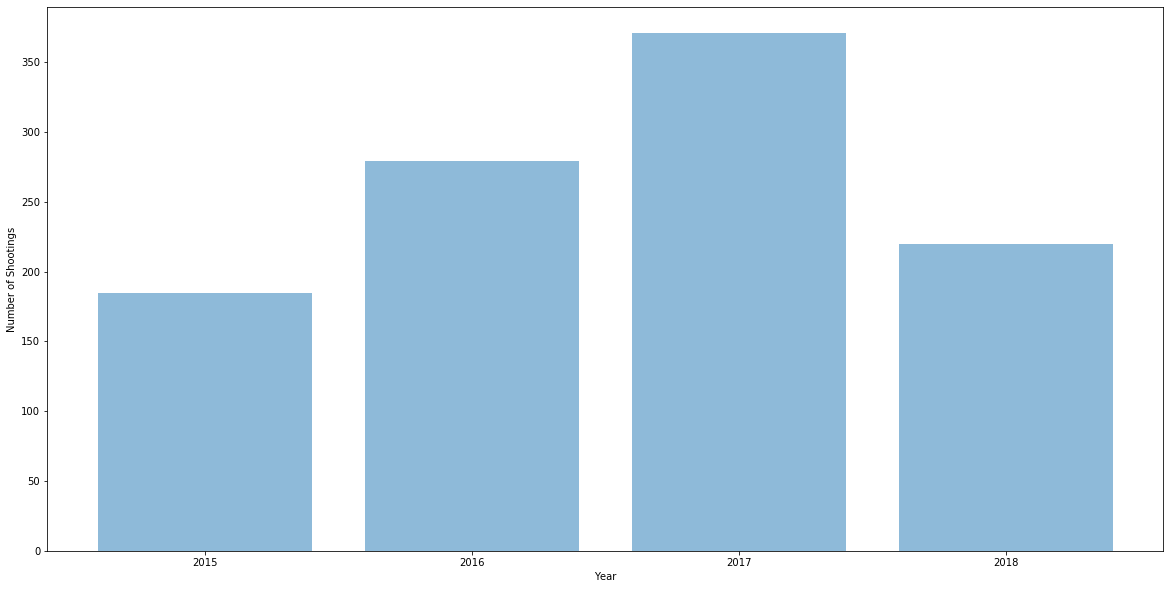

0

In [55]:
shoot_by_yr=df[df['SHOOTING']==1].groupby('YEAR').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_yr
bar_chart(shoot_by_yr['Number of Shootings'],shoot_by_yr['YEAR'],'Year','Number of Shootings')

***Month wise Shootings over the years***

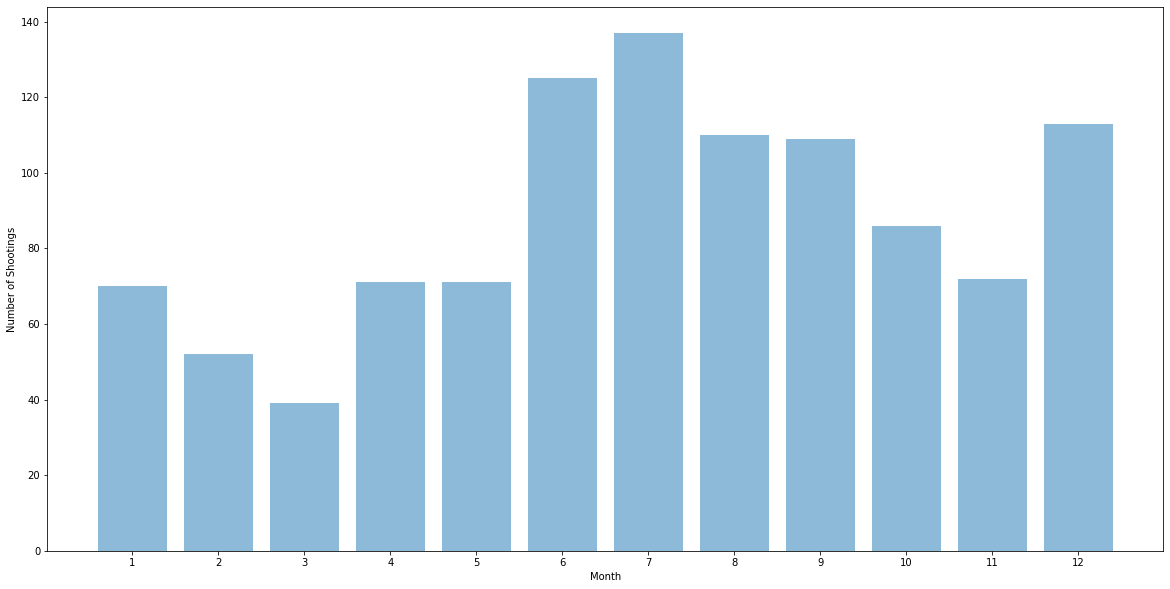

0

In [56]:
shoot_by_mnth=df[df['SHOOTING']==1].groupby('MONTH').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_mnth

bar_chart(shoot_by_mnth['Number of Shootings'],shoot_by_mnth['MONTH'],'Month','Number of Shootings')

***Day wise Shooting occurences over the years***

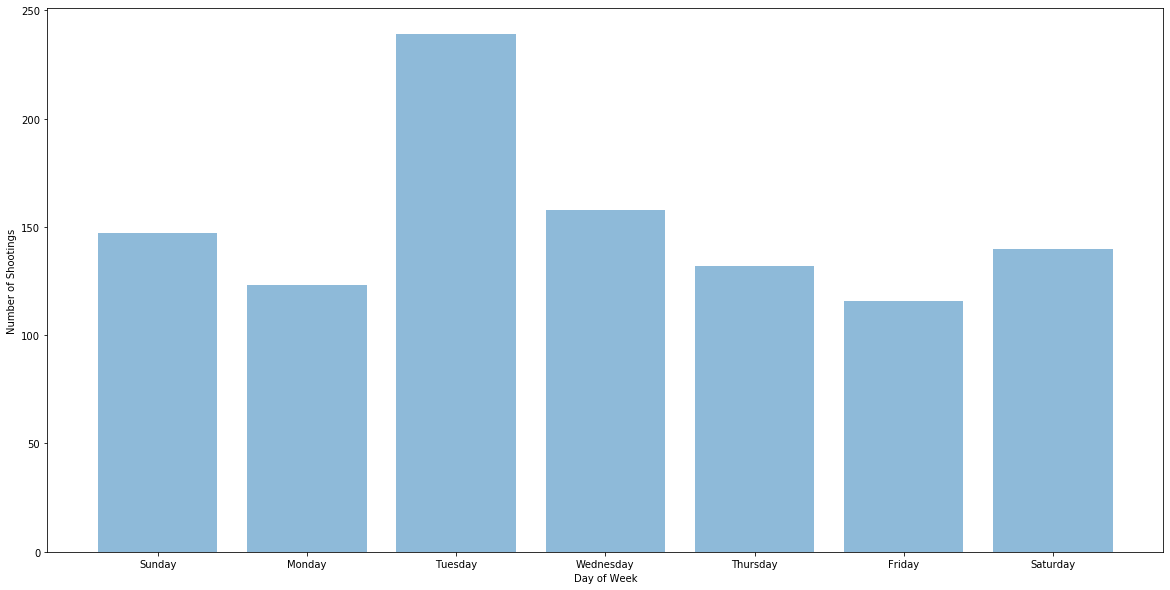

0

In [57]:
shoot_by_day=df[df['SHOOTING']==1].groupby('DAY_OF_WEEK').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_day

bar_chart(shoot_by_day['Number of Shootings'],day_of_week,'Day of Week','Number of Shootings')

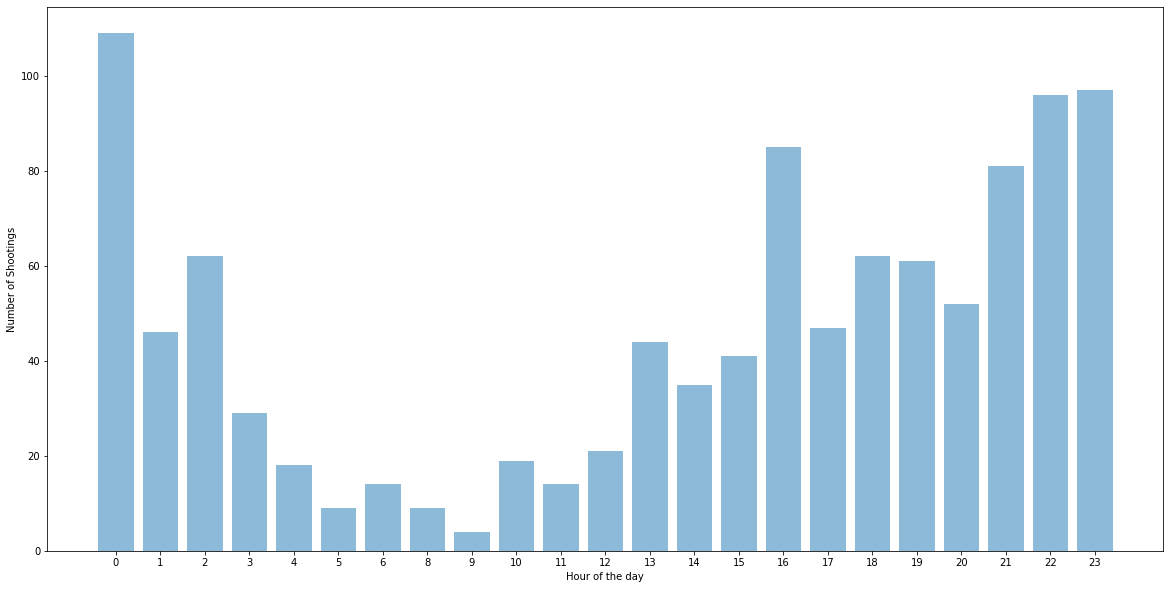

0

In [58]:
shoot_by_hour=df[df['SHOOTING']==1].groupby('HOUR').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_hour

bar_chart(shoot_by_hour['Number of Shootings'],shoot_by_hour['HOUR'],'Hour of the day','Number of Shootings')

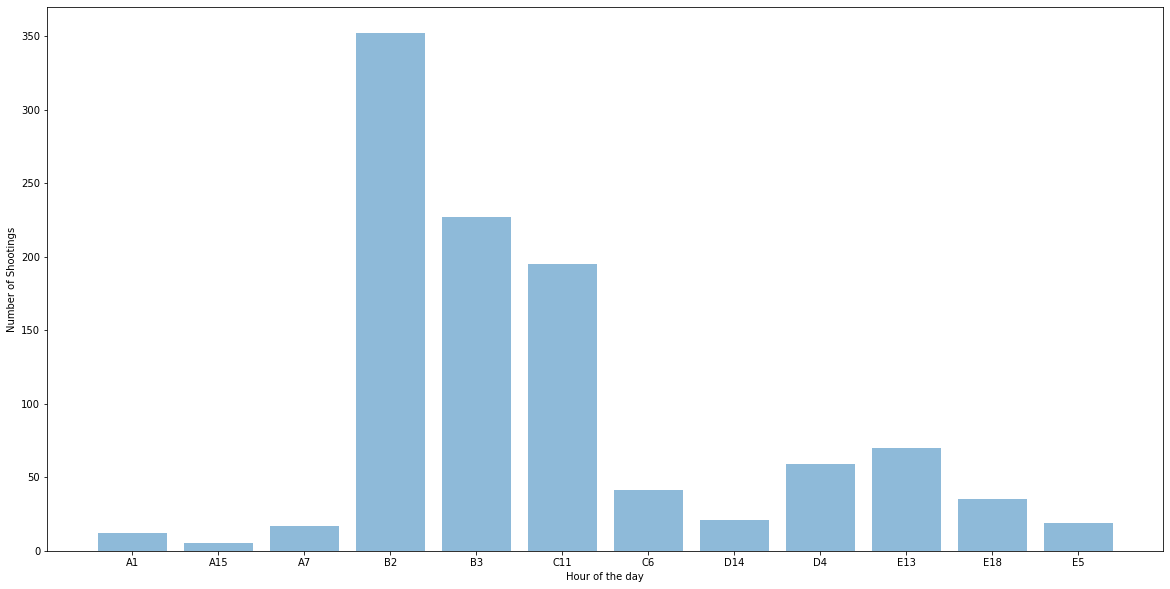

0

In [59]:
shoot_by_district=df[df['SHOOTING']==1].groupby('DISTRICT').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_district

bar_chart(shoot_by_district['Number of Shootings'],shoot_by_district['DISTRICT'],'Hour of the day','Number of Shootings')

***District wise Shooting occurences over the years - Each district is highlighted in a different color using cm.spectral option!
Two different ways to achieve the same output is also shown here***

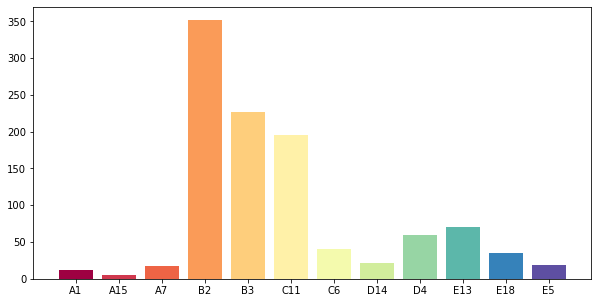

In [60]:
plt.figure(figsize=[10,5])
color_dis=plt.cm.Spectral(np.linspace(0, 1, len(shoot_by_district['DISTRICT'])))
plt.bar(shoot_by_district['DISTRICT'],shoot_by_district['Number of Shootings'], color=color_dis)
plt.show()

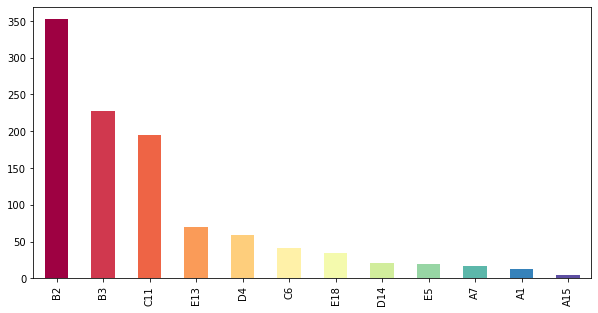

In [61]:
plt.figure(figsize=(10,5))
df_shoot=df[df['SHOOTING']==1]
df_shoot['DISTRICT'].value_counts().plot.bar(color=color_dis)
plt.show()

***Plotting Latitude and Longitudes of shooting crime locations in different kinds of joint plots to see if there is a pattern or concentration of crimes pertaining to a specific location***

***P.S. joinplot option in seaborn library creates its own figure and axes. Hence it does not have an 'ax' argument to allow us to add subplots***

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


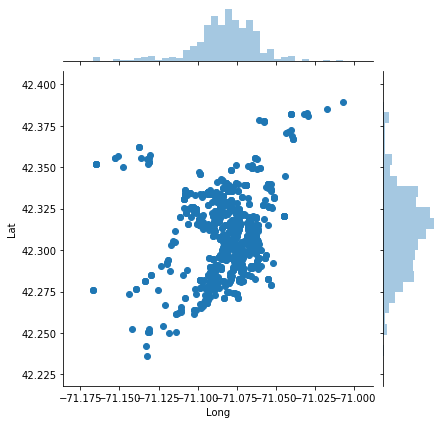

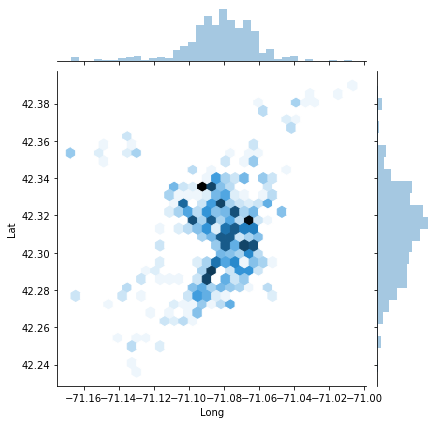

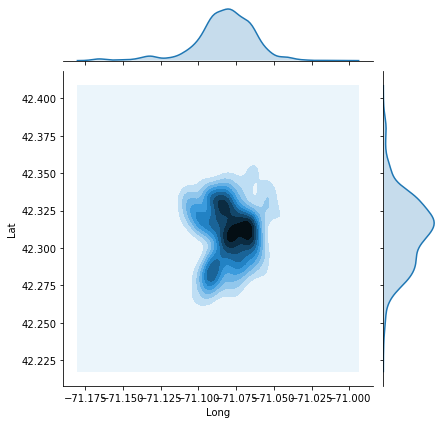

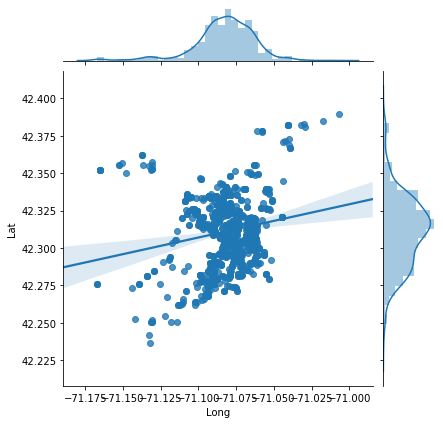

In [62]:
shoot_location = df_shoot[['Lat','Long']]
shoot_location = shoot_location.dropna()

shoot_location.head()
shoot_location=shoot_location.loc[(shoot_location['Lat']>40) & (shoot_location['Long'] < -60)]  

x_shoot = shoot_location['Long']
y_shoot = shoot_location['Lat']

sns.jointplot(x_shoot, y_shoot, kind='scatter')
sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')
sns.jointplot(x_shoot,y_shoot,kind='reg')
plt.show()

***Plot UCR Part wise Shootings over the years***

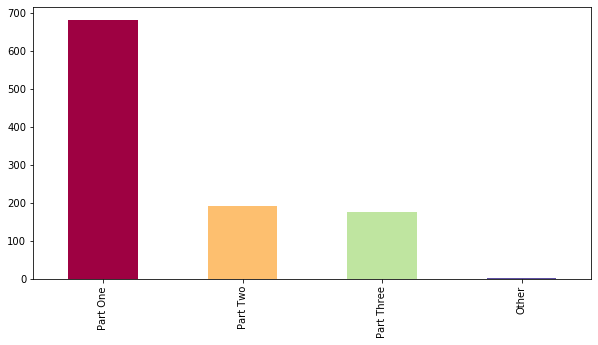

In [157]:
shoot_by_UCR=df[df['SHOOTING']==1].groupby('UCR_PART').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')

plt.figure(figsize=(10,5))
color_ucr=plt.cm.Spectral(np.linspace(0, 1, len(shoot_by_UCR['UCR_PART'])))
df_shoot['UCR_PART'].value_counts().plot.bar(color=color_ucr)
plt.show()

***Exploring all the crime locations based on longitude and Latitude data and see if it is concentrated somewhere or if there is a pattern visible***

In [63]:
df[['Lat','Long']].describe()

location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

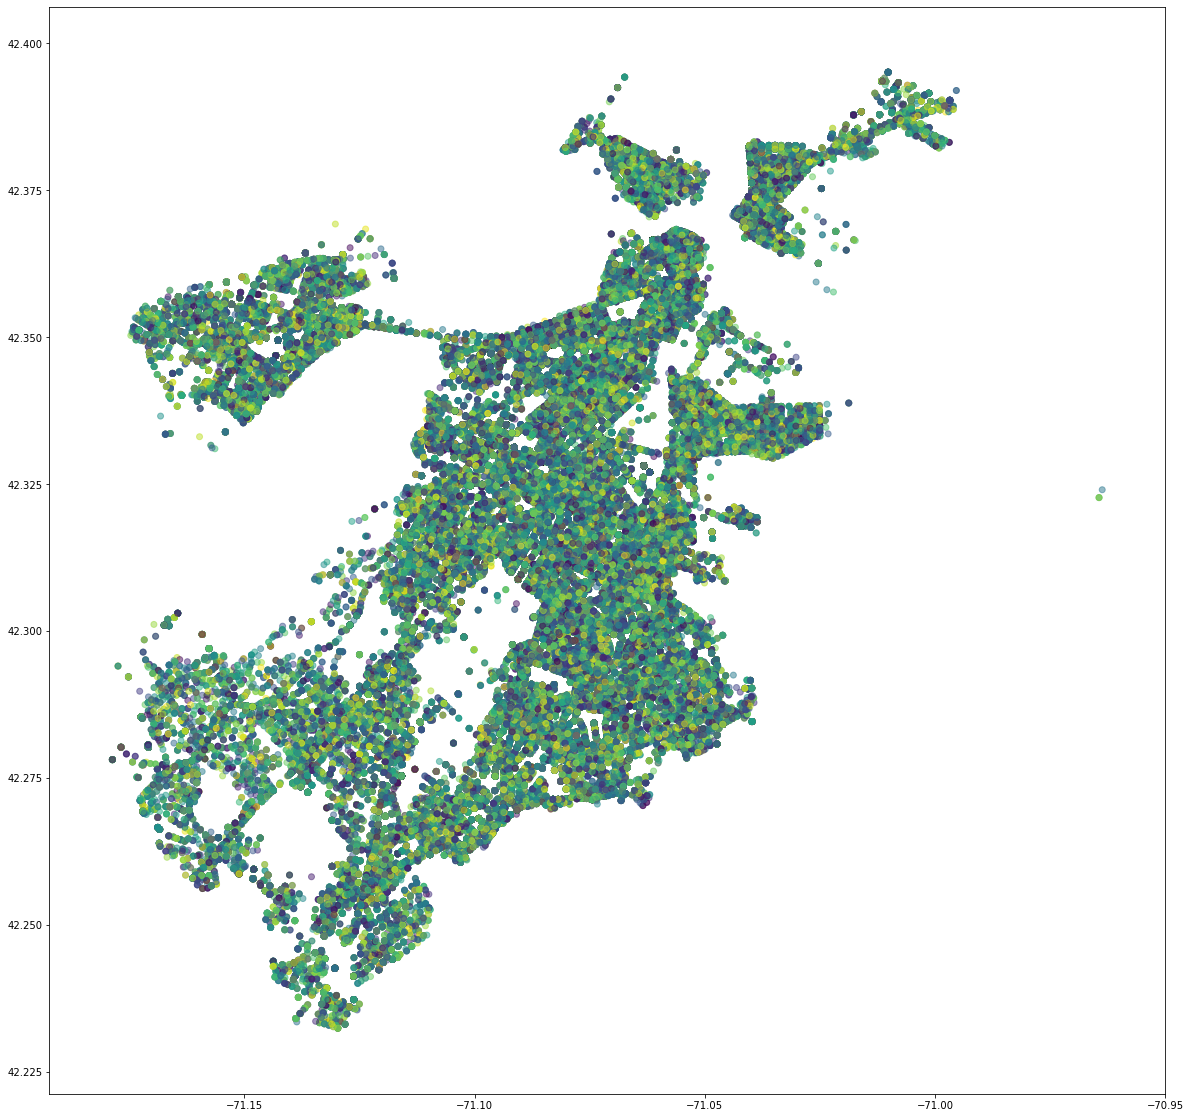

In [64]:
x = location['Long']
y = location['Lat']
rand_colors = np.random.rand(len(x))
plt.figure(figsize=(20,20))
plt.scatter(x, y,c=rand_colors, alpha=0.5)
plt.show()

In [65]:
m = folium.Map([42.348624, -71.062492], zoom_start=11)

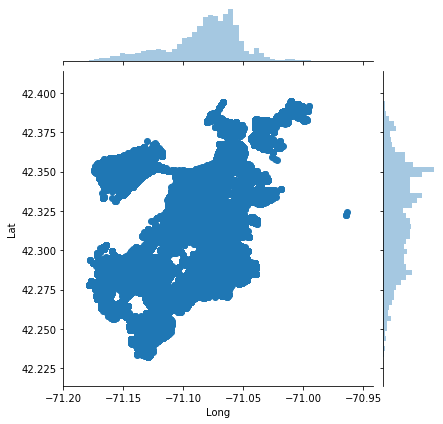

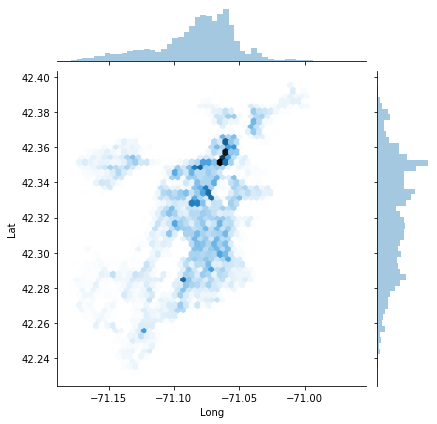

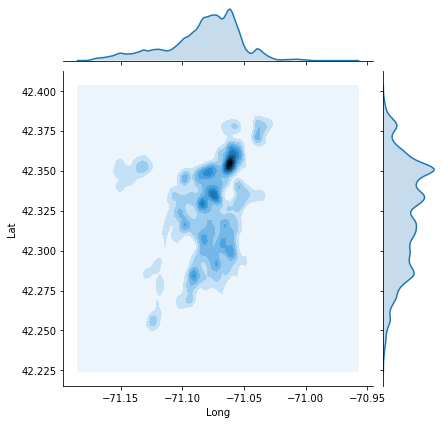

In [171]:
#generate various join plots to see if there is a pattern or trend
sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')

In [66]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

***Create a new category in the dataframe to indicate if the crime happened during Day or Night***

***Link to determine Day or Night based on Hour in Boston - https://www.timeanddate.com/sun/usa/boston ***

***We take the details on Day time for each of the 12 months from the above mentioned website and use the same to tag the said hours as Day***

***Then we Night using the logic that whenever Day==0, Night = 1***

In [67]:
df['Day']=0
df['Night']=0
# Day time for 1st month
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1

# Day time for 2st month
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day time for 3rd month
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day time for 4st month
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1

# Day time for 5th month
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 6th month
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1

# Day time for 7th month
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 8th month
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 9th month
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day time for 10th month
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day time for 11th month
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1

# Day time for 12th month
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1


#Update Night as 1 where Day is 0
df['Night'].loc[df['Day']==0]=1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


***Crime count on Day & Night***

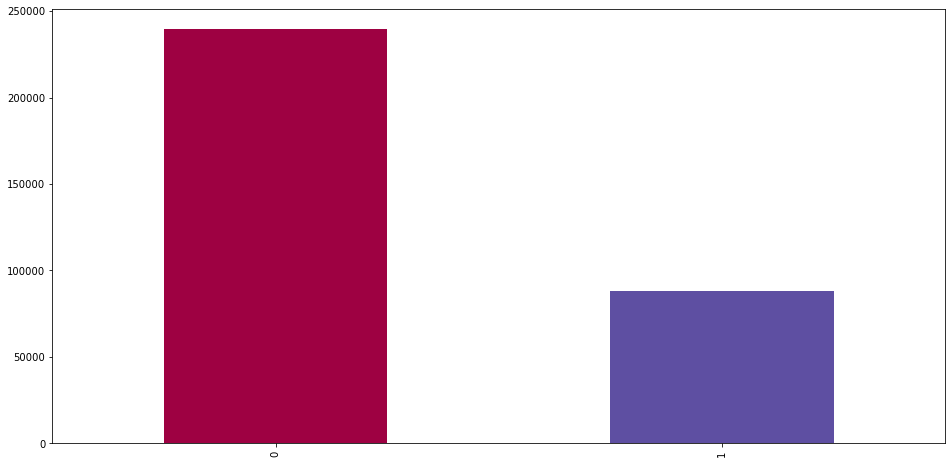

In [68]:
plt.figure(figsize=(16,8))
color_DN=plt.cm.Spectral(np.linspace(0, 1, 2))
df['Night'].value_counts().plot.bar(color=color_DN)
plt.show()

***Try to see if we can classify the Offense code group by considering other columns independent variables' behaviour/ pattern***

***Y - OFFENSE_CODE_GROUP;X - 'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK', 'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night'***

***Top Offense code groups***

In [69]:
df['OFFENSE_CODE_GROUP'].value_counts().head(15)

Motor Vehicle Accident Response    38134
Larceny                            26670
Medical Assistance                 24226
Investigate Person                 19176
Other                              18612
Drug Violation                     17037
Simple Assault                     16263
Vandalism                          15810
Verbal Disputes                    13478
Towed                              11632
Investigate Property               11443
Larceny From Motor Vehicle         11120
Property Lost                      10077
Warrant Arrests                     8579
Aggravated Assault                  8033
Name: OFFENSE_CODE_GROUP, dtype: int64

***Place the top offense code groups in a list***

In [70]:
list_offense_code_group=('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')
list_offense_code_group

('Motor Vehicle Accident Response',
 'Larceny',
 'Medical Assistance',
 'Investigate Person',
 'Other',
 'Drug Violation',
 'Simple Assault',
 'Vandalism',
 'Verbal Disputes',
 'Towed',
 'Investigate Property',
 'Larceny From Motor Vehicle')

***We are going to consider only top 15 offenses data for our model to minimize the noise***

In [71]:
df_model = pd.DataFrame()

In [88]:
i = 0

while i < len(list_offense_code_group):

    df_model = df_model.append(df.loc[df['OFFENSE_CODE_GROUP'] == list_offense_code_group[i]])
    
    i+=1

In [80]:
df_model.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location', 'Day', 'Night'],
      dtype='object')

***List only the needed columns and remove the rest***

In [85]:
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [89]:
df_model=df_model[list_column]

***We are going to convert the available column values into numbers***

***DISTRICT Values are being assigned numbers - Each district will be identified by a number***

In [90]:
df_model['DISTRICT'].unique()

array([nan, 'D14', 'C6', 'C11', 'B2', 'E18', 'A1', 'A7', 'B3', 'E13',
       'D4', 'E5', 'A15'], dtype=object)

In [91]:
df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model['DISTRICT'].unique()

array([nan,  6.,  5.,  8.,  3.,  2., 11., 10.,  1.,  7.,  9.,  4., 12.])

***Assign numbers to REPORTING_AREA column values or convert the string values to numerics***

In [93]:
df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

***As MONTH column values are already numbers we dont have to alter them***

In [94]:
df_model['MONTH'].unique()

array([10,  9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2])

***Assign Day number to DAY_OF_WEEK Column values with the week starting from Monday i.e. Monday is assigned the value 1 and so on ***

In [96]:
df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6, 
    'Sunday':7    
})

df_model['DAY_OF_WEEK'].unique()

array([3, 2, 1, 7, 4, 5, 6])

***As HOUR column values are already numbers we dont have to alter them***

In [97]:
df_model['HOUR'].unique()

array([20, 19, 15, 16, 14,  9, 17, 11, 22,  8,  7,  0, 23, 21, 10, 18, 12,
        2,  6, 13,  5,  4,  3,  1])

***LAT and LONG values are also in the expected format already***

In [98]:
df_model[['Lat', 'Long']].head()

,Lat,Long
6,42.320734,-71.056764
10,42.344323,-71.157784
15,42.315961,-71.090426
20,42.330015,-71.038513
68,42.310910,-71.057674


***Fill nan in our model with 0***

In [99]:
df_model.fillna(0, inplace = True)

***Define our independent variable/s --> X***

In [100]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

***Define our dependent variable--> Y***

In [101]:
y = df_model['OFFENSE_CODE_GROUP']

***Check our dependent variable and assign unique numbers to each category or group***

In [102]:
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [103]:
y=y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

***Import sklearn libraries***

In [107]:
from sklearn.model_selection import train_test_split

***Generate test and train datasets using train_test_split module of sklearn library***

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(201245, 9) (201245,)
(22361, 9) (22361,)


***Import Classification modules from sklearn***

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

***If lightgbm is not installed use the following command to get it installed - !conda install -c conda-forge lightgbm --yes***

***Import f1-score metric***

In [116]:
from sklearn.metrics import f1_score

***Define function to get mean, max and min that will be used to analyze the f1 score of different classifier algorithms***

In [117]:
def func_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

***Decision tree classifier function to train, predict and compare with actual values***

In [123]:
def func_DecisionTreeClassifier(x_train, y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(x_train, y_train)

    dec_tree_pred = dec_tree.predict(x_test)

    dec_tree_score = f1_score(y_test, dec_tree_pred, average=None)
    return func_results(dec_tree_score)

In [124]:
func_DecisionTreeClassifier(x_train,y_train)

mean: 0.2052741968710828
max: 0.48159097016930935
min: 0.08908045977011494


array([0.31408038, 0.32317881, 0.18310152, 0.1280583 , 0.1518338 ,
       0.48159097, 0.10895429, 0.09164247, 0.15949555, 0.26079447,
       0.17147934, 0.08908046])

***Bernoulli classfier function to train, predict and compare with actual values***

In [126]:
def func_BernoulliNB(x_train, y_train):
    bernoulli = BernoulliNB()
    bernoulli = bernoulli.fit(x_train, y_train)

    bernoulli_pred = bernoulli.predict(x_test)

    bernoulli_score = f1_score(y_test, bernoulli_pred, average=None)
    return func_results(bernoulli_score)

In [128]:
func_BernoulliNB(x_train,y_train)

mean: 0.05891380117138826
max: 0.26390403489640135
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.26390403, 0.22789916, 0.15486091, 0.        , 0.        ,
       0.        , 0.        , 0.06030151, 0.        , 0.        ,
       0.        , 0.        ])

***Extra tree classifier function to train, predict and compare with actual values***

In [131]:
def func_ext_tree_cls(x_train,y_train):
    ext_tree=ExtraTreeClassifier()
    ext_tree=ext_tree.fit(x_train,y_train)
    ext_tree_pred=ext_tree.predict(x_test)
    ext_tree_score=f1_score(y_test,ext_tree_pred,average=None)
    return func_results(ext_tree_score)

In [132]:
func_ext_tree_cls(x_train,y_train)

mean: 0.18940649015259545
max: 0.46546627250739053
min: 0.08


array([0.29574861, 0.2864593 , 0.16129032, 0.13014608, 0.13433221,
       0.46546627, 0.09365373, 0.1008456 , 0.12903226, 0.23844492,
       0.15745856, 0.08      ])

***K Neighbor classifier function to train, predict and compare with actual values***

In [160]:
def func_KNeighborsClassifier(x_train, y_train,n):
    Kneigh = KNeighborsClassifier(n_neighbors=n)
    Kneigh.fit(x_train, y_train) 

    Kneigh_pred = Kneigh.predict(x_test)

    Kneigh_score = f1_score(y_test, Kneigh_pred, average=None)
    return func_results(Kneigh_score)   


In [161]:
func_KNeighborsClassifier(x_train,y_train,5)

mean: 0.17684724367183136
max: 0.3724629731212287
min: 0.0576293385723641


array([0.31275571, 0.31125098, 0.15221815, 0.11983223, 0.11373802,
       0.37246297, 0.08972845, 0.07194245, 0.10786914, 0.26867168,
       0.1440678 , 0.05762934])

***Gaussian classifier function to train, predict and compare with actual values***

In [138]:
def func_GaussianNB(x_train, y_train):
    gaussian = GaussianNB()
    gaussian = gaussian.fit(x_train, y_train)

    gaussian_pred = gaussian.predict(x_test)

    gaussian_score = f1_score(y_test, gaussian_pred, average=None)
    return func_results(gaussian_score)


In [139]:
func_GaussianNB(x_train,y_train)

mean: 0.06424323288966395
max: 0.2507933629522169
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.24775112, 0.25079336, 0.0049403 , 0.        , 0.        ,
       0.        , 0.00123001, 0.10160772, 0.16459627, 0.        ,
       0.        , 0.        ])

***Random Forest classifier function to train, predict and compare with actual values***

In [140]:
def func_RandomForestClassifier(x_train, y_train):
    rfc = RandomForestClassifier()
    rfc = rfc.fit(x_train, y_train)

    rfc_pred = rfc.predict(x_test)

    rfc_score = f1_score(y_test, rfc_pred, average=None)
    return func_results(rfc_score)

In [141]:
func_RandomForestClassifier(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.22340364257556636
max: 0.5308266519214818
min: 0.09055809055809055


array([0.35502698, 0.3685417 , 0.19486976, 0.12976256, 0.14081346,
       0.53082665, 0.10481213, 0.09055809, 0.14376997, 0.32216015,
       0.19846491, 0.10123735])

***LGBM classifier function to train, predict and compare with actual values***

In [144]:
def func_LGBMClassifier(x_train, y_train):
    lgbm = LGBMClassifier()
    lgbm = lgbm.fit(x_train, y_train)

    lgbm_pred = lgbm.predict(x_test)

    lgbm_score = f1_score(y_test, lgbm_pred, average=None)
    return func_results(lgbm_score)

In [145]:
func_LGBMClassifier(x_train,y_train)

mean: 0.19979948488072852
max: 0.3906451612903226
min: 0.013521819299323909


array([0.34910814, 0.39064516, 0.16792775, 0.0806175 , 0.07479224,
       0.3783624 , 0.11253702, 0.01352182, 0.19089253, 0.36622146,
       0.18621701, 0.08675079])

In [ ]:
plt.figure()
plt

In [ ]:



# In[71]:



plt.plot(hr_num_crm['HOUR'], hr_num_crm['num_of_inc'], '-o')
plt.show()


# In[72]:


off_wis_crm=df.loc[0:,['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','INCIDENT_NUMBER']].groupby(['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']).count().INCIDENT_NUMBER.reset_index(name='num_of_crms')


# In[73]:


yr_crm=df.groupby('YEAR').size().reset_index(name='countperYr')


# In[74]:


yr_crm


# In[85]:


plt.plot(yr_crm['YEAR'],yr_crm['countperYr'],'-o')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


# In[ ]:





wrl_mp= folium.Map(location=[42.26260773,-71.12118637],zoom_start=4)
wrl_mp

df.head()


df.Long.fillna(np.mean(df.Long),inplace=True)

df.Lat.fillna(np.mean(df.Lat),inplace=True)

df2=df.head(100)
df2

m = folium.Map( zoom_start=2)

for i in range(0,len(df2)):
    folium.Marker([df2.iloc[i]['Lat'], df2.iloc[i]['Long']], popup=df2.iloc[i]['OFFENSE_CODE_GROUP']).add_to(m)

# In[ ]:
m.save('Boston_crme_map3.html')

df.iloc[1]['Long']


df.columns